In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


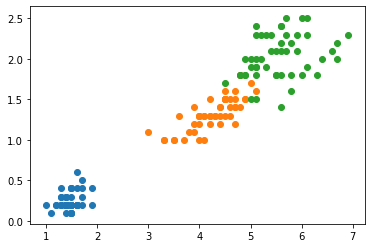

In [3]:
feature1 = 'petal_length'
feature2 = 'petal_width'
data = data[[feature1, feature2, 'class']]

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for cls in classes:
    curr_data = data[data['class'] == cls]
    plt.scatter(curr_data[feature1], curr_data[feature2], label=cls)
plt.show()

train_data = data.sample(frac=0.8)
val_data = data.drop(train_data.index)

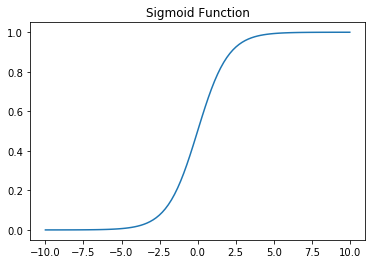

In [4]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.title('Sigmoid Function')
plt.show()

In [10]:
X = np.array(train_data[[feature1, feature2]])
m = len(X)
X = np.c_[np.ones(m), X]
Y = np.array(train_data['class'])
num_iters = 100000
lr = 0.001
W = None

for cls in classes:
    w = np.random.rand(3)
    y = np.array(Y == cls).astype(float)
    for i in np.arange(num_iters):
        diff = sigmoid(X @ w) - y
        w[0] -= lr * np.sum(diff)
        w[1] -= lr * np.sum(diff * X[:, 1])
        w[2] -= lr * np.sum(diff * X[:, 2])
        
        if (i+1) % 20000 == 0:
            r = sigmoid(X @ w)
            cost = np.sum(-y * np.log(r) - (1-y) * np.log(1-r)) / 2 / m
            print(f'{cls} | iteration={i+1} cost={cost:.5f}')
    
    W = w if W is None else np.vstack((W, w))


def predict(X, W, Y):
    preds = np.argmax(X @ W.T, axis=1)
    correct = 0
    total = len(preds)
    for i, pred in enumerate(preds):
        if pred == 0 and Y[i] == classes[0]:
            correct +=1
        elif pred == 1 and Y[i] == classes[1]:
            correct +=1
        elif pred == 2 and Y[i] == classes[2]:
            correct += 1
        else:
            # incorrect
            pass
    return correct / total


print(f'Train Accuracy={predict(X, W, Y):.3f}')
val_X = np.array(val_data[[feature1, feature2]])
val_X = np.c_[np.ones(len(val_X)), val_X]
val_Y = np.array(val_data['class'])
print(f'Val Accuracy={predict(val_X, W, val_Y):.3f}')

Iris-setosa | iteration=20000 cost=0.00152
Iris-setosa | iteration=40000 cost=0.00082
Iris-setosa | iteration=60000 cost=0.00057
Iris-setosa | iteration=80000 cost=0.00044
Iris-setosa | iteration=100000 cost=0.00036
Iris-versicolor | iteration=20000 cost=0.29384
Iris-versicolor | iteration=40000 cost=0.29384
Iris-versicolor | iteration=60000 cost=0.29384
Iris-versicolor | iteration=80000 cost=0.29384
Iris-versicolor | iteration=100000 cost=0.29384
Iris-virginica | iteration=20000 cost=0.05108
Iris-virginica | iteration=40000 cost=0.04424
Iris-virginica | iteration=60000 cost=0.04149
Iris-virginica | iteration=80000 cost=0.04002
Iris-virginica | iteration=100000 cost=0.03913
Train Accuracy=0.958
Val Accuracy=0.967


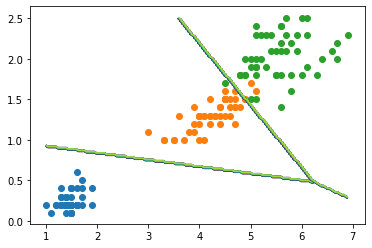

In [8]:
samples = 150
X = np.linspace(data['petal_length'].min(), data['petal_length'].max(), samples)
Y = np.linspace(data['petal_width'].min(), data['petal_width'].max(), samples)
Z_setosa = np.zeros((samples, samples))
Z_versicolor = np.zeros((samples, samples))
Z_virginica = np.zeros((samples, samples))
for xi, x in enumerate(X):
    for yi, y in enumerate(Y):
        d = np.array([1, x, y])
        pred = np.argmax(d @ W.T)
        if pred == 0:
            Z_setosa[xi][yi] = 1
        elif pred == 1:
            Z_versicolor[xi][yi] = 1
        elif pred == 2:
            Z_virginica[xi][yi] = 1

for i, cls in enumerate(classes):
    curr_data = data[data['class'] == cls]
    # plot the samples for this class
    plt.scatter(curr_data['petal_length'], curr_data['petal_width'], label=cls)
plt.contour(X, Y, Z_setosa)
plt.contour(X, Y, Z_versicolor)
plt.contour(X, Y, Z_virginica)
plt.show()